In [ ]:
# pip các thư viện cần thiết
!pip install numpy
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

In [ ]:
# import các thư viện và mô hình cần thiểt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [ ]:
FILE_PATH = '/content/drive/MyDrive/AIO 2024/Module_3/Week 4/T7/data/breast-cancer.csv'

In [ ]:
df = pd.read_csv(FILE_PATH,names=[
    'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat','label'
])
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [ ]:
# Lấy thông tin cơ bản của bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   label        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [ ]:
df.describe()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
count,286,286,286,286,278,286,286,285,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,150,60,213,222,130,152,110,218,201


In [ ]:
# Điền các giá trị khuyết thiếu theo tần suất xuất hiện của giá trị xuất hiện nhiều nhất
df['node-caps'] = df['node-caps'].fillna(df['node-caps'].mode()[0])
df['breast-quad'] = df['breast-quad'].fillna(df['breast-quad'].mode()[0])

In [ ]:
df.describe()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,label
count,286,286,286,286,286,286,286,286,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,150,60,213,230,130,152,111,218,201


In [ ]:
# Kiểm tra xem mỗi cột giá trị có phải categori không
for col in df.columns:
  print(f"unique value of {col} : {df[col].unique()}")

unique value of age : ["'40-49'" "'50-59'" "'60-69'" "'30-39'" "'70-79'" "'20-29'"]
unique value of menopause : ["'premeno'" "'ge40'" "'lt40'"]
unique value of tumor-size : ["'15-19'" "'35-39'" "'30-34'" "'25-29'" "'40-44'" "'10-14'" "'0-4'"
 "'20-24'" "'45-49'" "'50-54'" "'5-9'"]
unique value of inv-nodes : ["'0-2'" "'3-5'" "'15-17'" "'6-8'" "'9-11'" "'24-26'" "'12-14'"]
unique value of node-caps : ["'yes'" "'no'"]
unique value of deg-malig : ["'3'" "'1'" "'2'"]
unique value of breast : ["'right'" "'left'"]
unique value of breast-quad : ["'left_up'" "'central'" "'left_low'" "'right_up'" "'right_low'"]
unique value of irradiat : ["'no'" "'yes'"]
unique value of label : ["'recurrence-events'" "'no-recurrence-events'"]


In [ ]:
# Non-ranking feature : ['meopause','node-caps','breast','breast-quad','irradiat']
# ranking feature: ['age','tumor-size','inv-nodes','deg-malig']
non_ranking_feature = ['menopause','node-caps','breast','breast-quad','irradiat']
ranking_feature = ['age','tumor-size','inv-nodes','deg-malig']

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Mã hóa dữ liệu
transformer = ColumnTransformer(
    transformers=[
        ('OneHot',OneHotEncoder(drop='first'),non_ranking_feature),# Tạo ra một vector có kích thước bằng unique feature tại giá trị của value = 1 các khác = 0
        ('Ordinal',OrdinalEncoder(),ranking_feature)# Mã hóa như bình thường
    ]
)
X = transformer.fit_transform(X)
X

array([[0., 1., 1., ..., 2., 0., 2.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 6., 0., 1.],
       ...,
       [0., 1., 1., ..., 5., 5., 1.],
       [0., 1., 0., ..., 2., 0., 1.],
       [0., 0., 0., ..., 7., 0., 2.]])

In [ ]:
y = LabelEncoder().fit_transform(y)
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.15839699,  0.95219046,  2.02660871, ..., -0.96065727,
        -0.55562266,  1.29056424],
       [-0.15839699, -1.05021006, -0.49343516, ..., -0.96065727,
        -0.55562266, -1.42341644],
       [-0.15839699, -1.05021006, -0.49343516, ...,  0.90204089,
        -0.55562266, -0.0664261 ],
       ...,
       [-0.15839699,  0.95219046,  2.02660871, ...,  0.43636635,
         2.03245684, -0.0664261 ],
       [-0.15839699,  0.95219046, -0.49343516, ..., -0.96065727,
        -0.55562266, -0.0664261 ],
       [-0.15839699, -1.05021006, -0.49343516, ...,  1.36771543,
        -0.55562266,  1.29056424]])

In [ ]:
# Chia dữ liệu thành tập training, testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Khởi tạo mô hình và huấn luyện
clf = SVC(kernel='rbf',C=7.1)
clf.fit(X_train,y_train)

SVC(C=7.1)

In [ ]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
# Độ chính xác của mô hình
print(f"Độ chính xác của mô hình trên tập training: {accuracy_score(y_train,y_pred_train)}")
print(f"Độ chính xác của mô hình trên tập testing: {accuracy_score(y_test,y_pred_test)}")

Độ chính xác của mô hình trên tập training: 0.881578947368421
Độ chính xác của mô hình trên tập testing: 0.7586206896551724


In [ ]:
acc_train = []
acc_test = []
for C in range(1,20):
  clf = SVC(kernel='rbf',C=C)
  clf.fit(X_train,y_train)
  y_pred_test = clf.predict(X_test)
  y_pred_train = clf.predict(X_train)
  acc_train.append(accuracy_score(y_train,y_pred_train))
  acc_test.append(accuracy_score(y_test,y_pred_test))

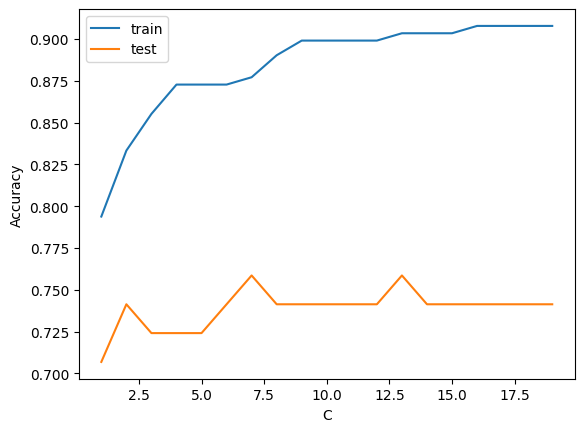

In [ ]:
# visualization độ ảnh hưởng của C
plt.plot(range(1,20),acc_train,label='train')
plt.plot(range(1,20),acc_test,label='test')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()